# Introduction to neural networks using Keras I

#### By Julian Rincon, _Department of Applied Mathematics and Computer Science, Universidad del Rosario_
#### Notebook originally written by Pavlos Protopapas, _Harvard Institute for Applied Computational Science_
###### Based on the book [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python) by François Chollet.

In this (first) tutorial we will cover/review the following topics:

1. A quick and dirty installation and introduction to [Keras](http://keras.io).
2. Basic concepts in neural networks seen in the lectures.
3. A prototypical application of neural networks using Keras.

Let us start by reviewing some basic components of machine and deep learning.

---

## Theory about Neural Networks

### From Linear to Deep Learning Models

#### Beyond Linear Models

Linear models can be fit efficiently via convex optimization, but the model capacity is limited.

Alternative:
$$ f(x) = w^T\phi(x) $$
where $\phi$ is a *non-linear transform*

A machine-learning model transforms its input data into meaningful outputs, a process that is "learned" from exposure to known examples of inputs and outputs. Therefore, _**the central problem in machine learning and deep learning is to meaningfully transform data**_: in other words, to learn useful *representations* of the input data at hand -- representations that get us closer to the expected output.

#### Traditional Machine Learning

One option is to use a very generic $\phi$. If $\phi(x)$ is of high enough dimension, we can always have enough capacity to fit the training set, but generalization to the test set often remains poor. Very generic feature mappings are usually based only on the principle of local smoothness and do not encode enough prior information to solve advanced problems.

Another option is to manually engineer $\phi$. Until the advent of deep learning, this was the dominant approach. It requires decades of human effort for each separate task, with practitioners specializing in different domains, such as speech recognition or computer vision, and with little transfer between domains.

#### Deep Learning

Directly learn $\phi$ with parameters $\theta$, specifically:
$$f(x;\theta) = w^T\phi(x;\theta)$$


We now have parameters $\theta$ that we use to learn $\phi$ from a broad class of functions, and parameters that map from $\phi(x)$ to the desired output. This is an example of a deep feed-forward network, with $\phi$ defining a hidden layer. This approach is the only one of the three that gives up on the convexity of the training problem, but the benefits outweigh the harms. In this approach, we parametrize the representation as $\phi(x;\theta)$ and use the optimization algorithm to find the $\theta$ that corresponds to a good representation. If we wish, this approach can capture the benefit of the first approach by being highly generic$-$we do so by using a very broad family $\phi(x;\theta)$. Deep learning can also capture the benefit of the second approach. Human practitioners can encode their knowledge to help generalization by designing families $\phi(x;\theta)$ that they expect will perform well. The advantage is that the human designer only needs to find the right general function family rather than finding precisely the right function.

![layers of representations](representations.png)

The *deep* in *deep learning* isn't a reference to any kind of deeper understanding achieved by the approach; rather, it stands for this idea of successive layers of representations. How many layers contribute to a model of the data is called the *depth* of the model. Other appropriate names for the field could have been *layered representations learning* and *hierarchical representations learning*. Modern deep learning often involves tens or even hundreds of successive layers of representations$-$and they're all learned automatically from exposure to training data.

### Components of Deep Learning

To do machine learning, and in particular deep learning, we need three things:

* **Input** data points$-$For instance, if the task is speech recognition, these data points could be sound files of people speaking. If the task is image tagging, they could be pictures.
* Examples of the expected **output**$-$In a speech-recognition task, these could be human-generated transcripts of sound files. In an image task, expected outputs could be tags such as "dog", "cat", and so on.
* A **cost (or loss) function** which is a way to measure whether the algorithm is doing a good job. This is necessary in order to determine the distance between the algorithm's current output and its expected output. The measurement is used as a feedback signal to adjust the way the algorithm works. This adjustment step is what we call *learning*.

![components of deep learning](components.png)

---

## Instructions to set up a workstation with Keras

We will assume we've already have installed on our workstation

1. [Python](https://www.python.org/) 3,
1. Linear algebra libraries: BLAS and LAPACK,
1. Python's scientific suite: [Numpy](http://www.numpy.org/), [Scipy](https://www.scipy.org/), and [Matplotlib](https://matplotlib.org/).

In order to set up a functioning workstation, it's recommended to work with [Jupyter](http://jupyter.org/) Notebooks. The Jupyter Notebook is an open-source web application that allows to code interactively. You can either install Jupyter using Python's package manager `pip` or directly install the Anaconda Distribution. Here we follow the first route. For details on how to install Jupyter go to http://jupyter.org/install.html.

In case you don't have it, you will need to install `pip`. However, make sure you've updated your OS's package database. If using OSX's `port`, you must update `port`'s tree and upgrade any installed ports. (Of course, use the corresponding package manager according to your OS.) In a terminal type

    sudo port selfupdate
    sudo port upgrade outdated #this might take a while
    sudo port install py34-pip
    sudo port select --set pip pip34

The `py34` above stands for Python3.4, again, change that accordingly in your workstation. The actual installation of [Jupyter](http://jupyter.org/) will follow from the commands:

    sudo -H python3 -m pip install --upgrade pip  
    sudo -H python3 -m pip install jupyter

Consider setting up and exporting the environment variable `PATH`, if necessary.

The framework [Keras](http://keras.io) is a front-end to deep learning engines such as [TensorFlow](https://www.tensorflow.org/), [Theano](https://github.com/Theano/), and Microsoft's Cognitive Toolkit [CNTK](https://www.microsoft.com/en-us/cognitive-toolkit/). It's highly recommended to use TensorFlow, so that's the back-end we will install.

Next we install TensorFlow, for further details visit https://www.tensorflow.org/install/. Input in your terminal

    sudo -H pip install tensorflow

and follow any prompted instructions.

Finally, for the last step we get to install the Keras framework:

    sudo -H pip install keras

More information is provided in Kera's website https://keras.io/. In order to check the successful installation of both TensorFlow and Keras open an interactive Python 3 session and type 

    import keras
    keras.__version__

you should see an output that includes the message 

> Using TensorFlow backend.  
> '2.2.0'

or something like that. If you get a message of that form then we've swimmingly installed Keras and its dependencies.

Optionally, you may want to install other useful libraries. [HDF5](https://matplotlib.org/) and [h5py](https://www.h5py.org/) for quick and efficient manipulation of large files. [Graphviz](https://www.graphviz.org/) for explicit visualization of Keras models. For GPU support you will need to install CUDA, cuDNN, and install TensorFlow with GPU support. For details check out NVIDIA's web page https://developer.nvidia.com/.

Let's now move on to some neural networks applications.

---

## Deep learning examples using Keras

This notebook contains the code samples found in Chapter 2, Section 1 and 5 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff) by F. Chollet. Note that the original text features far more content, in particular further explanations and figures: in this notebook, you will only find source code and related comments.

### Hand-written digit image classification

We will now take a look at a first concrete example of a neural network, which makes use of the Python library Keras to learn to classify hand-written digits. Unless you already have experience with Keras or similar libraries, you will not understand everything about this first example right away. You probably haven't even installed Keras yet. Don't worry, that is perfectly fine. In the next lecture or lab, we will review each element in our example and explain them in detail. So don't worry if some steps seem arbitrary or look like magic to you! We've got to start somewhere.

The problem we are trying to solve here is to classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 categories (0 to 9). The dataset we will use is the `MNIST` dataset, a classic dataset in the machine learning community, which has been around for almost as long as the field itself and has been very intensively studied. It's a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (NIST) in the 1980s. *You can think of "solving" MNIST as the "Hello World" of deep learning* -- it's what you do to verify that your algorithms are working as expected. As you become a machine learning practitioner, you will see MNIST come up over and over again, in scientific papers, blog posts, and so on.

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

In [106]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

`train_images` and `train_labels` form the "training set", the data that the model will learn from. The model will then be tested on the "test set", `test_images` and `test_labels`. Our images are encoded as Numpy arrays, and the labels are simply an array of digits, ranging from 0 to 9. There is a one-to-one correspondence between the images and the labels.

Let's have a look at the training data:

In [107]:
train_images.shape

(60000, 28, 28)

In [108]:
len(train_labels)

60000

In [109]:
print(train_labels.shape, train_images[0])

(60000,) [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 2

Let's have a look at the test data:

In [110]:
test_images.shape

(10000, 28, 28)

In [111]:
len(test_labels)

10000

In [112]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Let's randomly plot actual images to see and verify their content. We first need to import the `matplotlib` library for visualization, then we can plot the images.

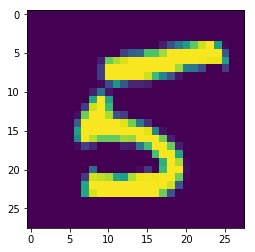

The label for this image is 5


In [113]:
import numpy as np
import matplotlib.pyplot as plt

img = np.random.randint(0, len(train_images))
digit = train_images[img]
plt.imshow(digit)
plt.show();
print('The label for this image is', train_labels[img])

What does the following instruction do?

In [114]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Our workflow will be as follow: first we will present our neural network with the training data, `train_images` and `train_labels`. The network will then learn to associate images and labels. Finally, we will ask the network to produce predictions for `test_images`, and we will verify if these predictions match the labels from `test_labels`.

Let's build our network $-$ again, remember that you aren't supposed to understand everything about this example just yet.

In [10]:
from keras import models, layers

network = models.Sequential()
network.add(layers.Dense(512, activation='sigmoid', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='sigmoid'))
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


The core building block of neural networks is the **layer**, a data-processing module which you can conceive as a "filter" for data. Some data comes in, and comes out in a more useful form. Precisely, layers extract _representations_ out of the data fed into them $-$ hopefully representations that are more meaningful for the problem at hand. Most of deep learning really consists of chaining together simple layers which will implement a form of progressive "data distillation". A deep learning model is like a sieve for data processing, made of a 
succession of increasingly refined data filters $-$ the "layers".

Here our network consists of a sequence of two `Dense` layers, which are densely-connected  or **fully-connected** neural layers. The second (and last) layer is a 10-way "softmax" layer, which means it will return an array of 10 probability scores (summing to 1). Each score will be the probability that the current digit image belongs to one of our 10 digit classes.

To make our network ready for training, we need to pick three more things, as part of the "compilation" step:

* A _loss function_: this is how the network will be able to measure how good a job it's doing on its training data, and thus how it will be able to steer itself in the right direction.
* An _optimizer_: this is the mechanism through which the network will update itself based on the data it sees and its loss function.
* Some _metrics_ to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly classified).

The exact purpose of the loss function and the optimizer will be made clear throughout the next two chapters.

In [11]:
network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Before training, we will preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in the `[0, 1]` interval. Previously, our training images for instance were stored in an array of shape `(60000, 28, 28)` of type `uint8` with values in the `[0, 255]` interval. We transform it into a `float32` array of shape `(60000, 28 * 28)` with values between 0 and 1.

In [12]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

We also need to categorically encode the labels, a step which we explain in chapter 3:

In [13]:
print(train_labels[0])

5


In [14]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [15]:
print(train_labels[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


We are now ready to **train** our network, which in Keras is done via a call to the `fit` method of the network: 
we "fit" the model to its training data.

In [16]:
%%time
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 4s 64us/step - loss: 2.1425 - acc: 0.4414
Epoch 2/5
60000/60000 [==============================] - 3s 52us/step - loss: 1.6003 - acc: 0.7459
Epoch 3/5
60000/60000 [==============================] - 4s 61us/step - loss: 1.1686 - acc: 0.7983
Epoch 4/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.9167 - acc: 0.8268
Epoch 5/5
60000/60000 [==============================] - 3s 54us/step - loss: 0.7692 - acc: 0.8415
CPU times: user 37.8 s, sys: 3.03 s, total: 40.8 s
Wall time: 17.9 s


Two quantities are being displayed during training: the "loss" of the network over the training data, and the "accuracy" of the network over the training data.

We quickly reach an accuracy of 0.989 (i.e. 98.9%) on the training data. Now let's check that our model performs well on the test set too:

In [17]:
%%time
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 45us/step
CPU times: user 857 ms, sys: 33.7 ms, total: 891 ms
Wall time: 456 ms


In [18]:
#Test Phase
print('test_acc:', test_acc, '\ntest_loss:', test_loss)

test_acc: 0.8584 
test_loss: 0.6938668855667114


Just for comparison, let's explicitly evaluate the model performance information on the training data:

In [19]:
%%time
train_loss, train_acc = network.evaluate(train_images, train_labels)

60000/60000 [==============================] - 2s 39us/step
CPU times: user 4.81 s, sys: 128 ms, total: 4.94 s
Wall time: 2.36 s


In [20]:
print('train_acc:', train_acc, '\ntrain_loss:', train_loss)

train_acc: 0.8474833333333334 
train_loss: 0.7154427848498026


Our **test set accuracy** turns out to be 97.8% $-$ that's quite a bit lower than the **training set accuracy** 99.2%. 
This gap between training accuracy and test accuracy is an example of "overfitting", the fact that machine learning models tend to perform worse on new data than on their training data. Overfitting will be a central topic in chapter 3.

This concludes our very first example $-$ you just saw how we could build and a train a neural network to classify handwritten digits, in less than 20 lines of Python code.

In the next lecture/lab, we will go in detail over every moving piece we just previewed, and clarify what is really 
going on behind the scenes.

### Performance plots as a function of hyper-parameters

Do the exercises propose at the end of this notebook in this section.

In [115]:
import numpy as np
import matplotlib.pyplot as plt

from keras import models
from keras import layers
#from keras import optimizers
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [116]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [117]:
%%time
hp_list, train_acc_list, test_acc_list = [], [], []

for q in range(5, 13, 2):
    hp =  2 ** q
    print('*'*40, 'hyper-parameter', hp, '*'*40)
    
    network = models.Sequential()
    network.add(layers.Dense(512, activation='sigmoid', input_shape=(28 * 28,)))
    network.add(layers.Dense(10, activation='sigmoid'))

    #sgd = optimizers.SGD(lr=.001, momentum=0.9, nesterov=True, decay=1e-6)
    network.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    network.fit(train_images, train_labels, epochs=5, batch_size=hp)

    test_loss, test_acc = network.evaluate(test_images, test_labels)
    train_loss, train_acc = network.evaluate(train_images, train_labels)
    
    hp_list.append(hp)
    test_acc_list.append(test_acc)
    train_acc_list.append(train_acc)

**************************************** hyper-parameter 32 ****************************************
Epoch 1/5
60000/60000 [==============================] - 7s 119us/step - loss: 1.4971 - acc: 0.6620
Epoch 2/5
60000/60000 [==============================] - 7s 114us/step - loss: 0.6652 - acc: 0.8518
Epoch 3/5
60000/60000 [==============================] - 7s 115us/step - loss: 0.4970 - acc: 0.8741
Epoch 4/5
60000/60000 [==============================] - 7s 115us/step - loss: 0.4313 - acc: 0.8856
Epoch 5/5
60000/60000 [==============================] - 3s 45us/step
**************************************** hyper-parameter 128 ****************************************
Epoch 1/5
60000/60000 [==============================] - 3s 58us/step - loss: 2.1526 - acc: 0.4295
Epoch 2/5
60000/60000 [==============================] - 3s 51us/step - loss: 1.6187 - acc: 0.7230
Epoch 3/5
60000/60000 [==============================] - 3s 53us/step - loss: 1.1863 - acc: 0.7889
Epoch 4/5
60000/60000 [=======

In [24]:
#rmsprop
print('train_acc_list', train_acc_list)
print('test_acc_list', test_acc_list)

train_acc_list [0.8924666666666666, 0.8483166666666667, 0.763, 0.4472]
test_acc_list [0.8987, 0.8565, 0.7784, 0.4605]


In [25]:
#sgd
print('train_acc_list', train_acc_list)
print('test_acc_list', test_acc_list)

train_acc_list [0.8924666666666666, 0.8483166666666667, 0.763, 0.4472]
test_acc_list [0.8987, 0.8565, 0.7784, 0.4605]


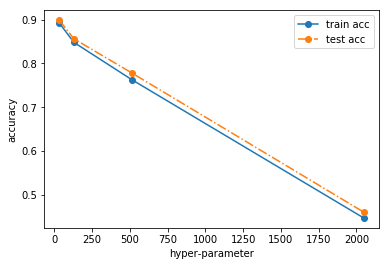

In [26]:
plt.plot(hp_list, train_acc_list, '-o', label='train acc')
plt.plot(hp_list, test_acc_list, '-.o', label='test acc')
plt.xlabel('hyper-parameter')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### Checking image prediction

So far we've dealing with pretty technical stuff: how to build neural network models, train them, test them, etc. Let's now check whether a given image is correctly classified within their corresponding class. How do we do that? Well...

1. Choose and load a random image in the appropriate format from the appropriate dataset.
1. Use the `predict_classes` method from Keras. (Find its documentation.)
1. Extract the prediction from whatever structure the above method returns.
1. Display the selected image and print the corresponding class prediction.

Try to implement this during the lab. Discuss what kind of models you encountered.

In [27]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [37]:
img = np.random.randint(0, len(test_images))
check_image = test_images[img].reshape((1,784))
check_image = check_image.astype('float32') / 255
check_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [38]:
check_class = network.predict_classes(check_image)
print(type(check_class))

prediction = check_class
prediction

<class 'numpy.ndarray'>


array([1])

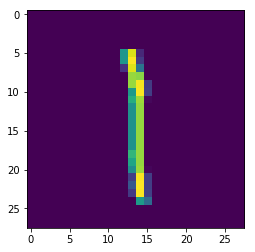

The label for this image is 1


In [39]:
digit = test_images[img]
plt.imshow(digit)
plt.show()
print('The label for this image is', test_labels[img])

### Exercises

Now that you are a little bit more acquainted with the framework Keras, it's time to play around with some of the hyper-parameters that we can modify when constructing and training a neural network. The idea is to keep using the hand-written digit recognition example.

In this exercise, you will plot and analyze how the neural network model performs, i.e. inspect accuracy and loss, when you modify the following parameters keeping all the other model parameters fixed:

* Number of epochs, fixed batch size,
* Batch size, fixed number of epochs,
* Number of neurons per layer, fixed number of layers,
* Number of layers, fixed number of neurons per layer.

Time permitting, it is also enlightening to analyze loss and accuracy when the activation parameter is modified. For instance, try changing `relu`s for `sigmoid`s and check out the performance of the neural network. What happen if the output layer's activation function is not `sigmoid` but a `softmax`?

In [120]:
epochs = [n for n in range(5,13,2)]
batch_sz = [2**n for n in range(5,13,2)]
n_units = [2**n for n in range(5,13,2)]
#n_layers = [n for n in range(2,10,2)]
act_list = ['relu','sigmoid','softmax']
print("""Lists of iterations:\n
Epochs List:
{epochs}\n
Batch Size List
{batch_sz}\n
Number of Units(Neurons) per Layer:
{n_neurons}\n
Activation Function List:
{act_list}\n"""
      .format(
          epochs=epochs,
          batch_sz=batch_sz,
          n_neurons=n_units,
          act_list=act_list,
      ))
listofhp = [epochs,batch_sz,n_units,act_list] #List of Hiper-parameters

Lists of iterations:

Epochs List:
[5, 7, 9, 11]

Batch Size List
[32, 128, 512, 2048]

Number of Units(Neurons) per Layer:
[32, 128, 512, 2048]

Activation Function List:
['relu', 'sigmoid', 'softmax']



In [122]:
%%time

train_acc_list, test_acc_list = [], []
messages = ["Epochs","Batch Size","Neurons/layer","Activation Function"]


print("Standar Hyper-params: \nEpochs: 5, Batch Size: 128, Neurons/Layer: 512 and 10(This 10 is static), Activation F: sigmoid")
for index, n in enumerate(listofhp):
    for i in n:
        print("\n","*"*30,"hyper-parameter:", messages[index],i, "*"*30)
        network = models.Sequential()
        # Neurons
        if index == 2: 
            network.add(layers.Dense(i, activation='sigmoid', input_shape=(28 * 28,)))
            network.add(layers.Dense(10, activation='sigmoid'))
        # Activation Function
        elif index == 3:
            network.add(layers.Dense(512, activation=i, input_shape=(28 * 28,)))
            network.add(layers.Dense(10, activation=i))            
        else:
            network.add(layers.Dense(512, activation='sigmoid', input_shape=(28 * 28,)))
            network.add(layers.Dense(10, activation='sigmoid'))
        
        network.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
        # Epochs
        if index == 1:
            network.fit(train_images, train_labels, epochs=5, batch_size=i)
        # Batch Size
        elif index == 0:
            network.fit(train_images, train_labels, epochs=i, batch_size=128)
        else:
            network.fit(train_images, train_labels, epochs=5, batch_size=128) 
        
        test_loss, test_acc = network.evaluate(test_images, test_labels)
        train_loss, train_acc = network.evaluate(train_images, train_labels)

            
        
        #hp_list.append(hp)
        #test_acc_list.append(test_acc)
        #train_acc_list.append(train_acc)
            

Standar Hyper-params: 
Epochs: 5, Batch Size: 128, Neurons/Layer: 512 and 10(This 10 is static), Activation F: sigmoid

 ****************************** hyper-parameter: Epochs 5 ******************************
Epoch 1/5
60000/60000 [==============================] - 4s 60us/step - loss: 2.1553 - acc: 0.4240
Epoch 2/5
60000/60000 [==============================] - 3s 55us/step - loss: 1.6288 - acc: 0.7328
Epoch 3/5
60000/60000 [==============================] - 3s 53us/step - loss: 1.1934 - acc: 0.7908
Epoch 4/5
60000/60000 [==============================] - 3s 53us/step - loss: 0.9344 - acc: 0.8203
Epoch 5/5
60000/60000 [==============================] - 2s 41us/step

 ****************************** hyper-parameter: Epochs 7 ******************************
Epoch 1/7
60000/60000 [==============================] - 3s 58us/step - loss: 2.1583 - acc: 0.4398
Epoch 2/7
60000/60000 [==============================] - 3s 52us/step - loss: 1.6221 - acc: 0.7338
Epoch 3/7
60000/60000 [==============

Epoch 5/5
60000/60000 [==============================] - 2s 25us/step

 ****************************** hyper-parameter: Neurons/layer 512 ******************************
Epoch 1/5
60000/60000 [==============================] - 4s 61us/step - loss: 2.1143 - acc: 0.4725
Epoch 2/5
60000/60000 [==============================] - 3s 54us/step - loss: 1.5743 - acc: 0.7395
Epoch 3/5
60000/60000 [==============================] - 3s 56us/step - loss: 1.1586 - acc: 0.7923
Epoch 4/5
60000/60000 [==============================] - 3s 55us/step - loss: 0.9133 - acc: 0.8227
Epoch 5/5
60000/60000 [==============================] - 3s 44us/step

 ****************************** hyper-parameter: Neurons/layer 2048 ******************************
Epoch 1/5
60000/60000 [==============================] - 13s 224us/step - loss: 2.0481 - acc: 0.4319
Epoch 2/5
60000/60000 [==============================] - 13s 219us/step - loss: 1.3844 - acc: 0.7534
Epoch 3/5
60000/60000 [==============================] - 12s 20

---

## Further reading

Most of this introduction is based on the book [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python) by François Chollet, the creator of Keras. It is a very practical introduction to Deep Learning without requiring all the mathematical background.

The [Deep Learning](http://www.deeplearningbook.org/) book is a theoretical book in three parts: 1) The mathematical basis for Deep Learning, 2) Modern Practice Deep Networks, 3) Deep Learning Research. It is a good second book after getting some practical initial experience.

For more advance deep learning practitioners, check out the book from the [link](https://machinelearningmastery.com/deep-learning-with-python/).

We also recommend Andrew Ng's online course: https://www.deeplearning.ai/

In [153]:
from keras.optimizers import SGD

In [142]:
%%time
# XOR

X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[1],[1],[0]])
train_loss_list = []

for epo in range(200, 1200, 200):
    print("*"*30,"Epochs:",epo,"*"*30)
    model = models.Sequential()
    model.add(layers.Dense(8, input_dim=2, activation='tanh'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))
    model.fit(X, Y, batch_size=1, epochs=epo)

    train_loss = model.evaluate(X, Y)
    train_loss_list.append(train_loss)

****************************** Epochs: 200 ******************************
Epoch 1/200
4/4 [==============================] - 1s 226ms/step - loss: 0.8040
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7977
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7835
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7726
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 0.7677
Epoch 6/200
4/4 [==============================] - 0s 3ms/step - loss: 0.7623
Epoch 7/200
4/4 [==============================] - 0s 3ms/step - loss: 0.7568
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7595
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 0.7520
Epoch 10/200
4/4 [==============================] - 0s 3ms/step - loss: 0.7527
Epoch 11/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7469
Epoch 12/200
4/4 [==============================] - 0s 2ms/step 

4/4 [==============================] - 0s 2ms/step - loss: 0.7439
Epoch 5/400
4/4 [==============================] - 0s 2ms/step - loss: 0.7404
Epoch 6/400
4/4 [==============================] - 0s 2ms/step - loss: 0.7372
Epoch 7/400
4/4 [==============================] - 0s 2ms/step - loss: 0.7330
Epoch 8/400
4/4 [==============================] - 0s 3ms/step - loss: 0.7315
Epoch 9/400
4/4 [==============================] - 0s 4ms/step - loss: 0.7294
Epoch 10/400
4/4 [==============================] - 0s 4ms/step - loss: 0.7262
Epoch 11/400
4/4 [==============================] - 0s 2ms/step - loss: 0.7244
Epoch 12/400
4/4 [==============================] - 0s 2ms/step - loss: 0.7211
Epoch 13/400
4/4 [==============================] - 0s 3ms/step - loss: 0.7167
Epoch 14/400
4/4 [==============================] - 0s 3ms/step - loss: 0.7145
Epoch 15/400
4/4 [==============================] - 0s 2ms/step - loss: 0.7128
Epoch 16/400
4/4 [==============================] - 0s 3ms/step - loss

4/4 [==============================] - 0s 2ms/step - loss: 0.0455
Epoch 210/400
4/4 [==============================] - 0s 2ms/step - loss: 0.0452
Epoch 211/400
4/4 [==============================] - 0s 2ms/step - loss: 0.0448
Epoch 212/400
4/4 [==============================] - 0s 2ms/step - loss: 0.0444
Epoch 213/400
4/4 [==============================] - 0s 2ms/step - loss: 0.0440
Epoch 214/400
4/4 [==============================] - 0s 2ms/step - loss: 0.0437
Epoch 215/400
4/4 [==============================] - 0s 2ms/step - loss: 0.0433
Epoch 216/400
4/4 [==============================] - 0s 4ms/step - loss: 0.0430
Epoch 217/400
4/4 [==============================] - 0s 2ms/step - loss: 0.0426
Epoch 218/400
4/4 [==============================] - 0s 2ms/step - loss: 0.0423
Epoch 219/400
4/4 [==============================] - 0s 2ms/step - loss: 0.0419
Epoch 220/400
4/4 [==============================] - 0s 3ms/step - loss: 0.0416
Epoch 221/400
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step - loss: 0.7154
Epoch 13/600
4/4 [==============================] - 0s 2ms/step - loss: 0.7161
Epoch 14/600
4/4 [==============================] - 0s 2ms/step - loss: 0.7113
Epoch 15/600
4/4 [==============================] - 0s 2ms/step - loss: 0.7087
Epoch 16/600
4/4 [==============================] - 0s 2ms/step - loss: 0.7057
Epoch 17/600
4/4 [==============================] - 0s 2ms/step - loss: 0.7025
Epoch 18/600
4/4 [==============================] - 0s 2ms/step - loss: 0.6958
Epoch 19/600
4/4 [==============================] - 0s 2ms/step - loss: 0.6968
Epoch 20/600
4/4 [==============================] - 0s 2ms/step - loss: 0.6898
Epoch 21/600
4/4 [==============================] - 0s 2ms/step - loss: 0.6862
Epoch 22/600
4/4 [==============================] - 0s 2ms/step - loss: 0.6834
Epoch 23/600
4/4 [==============================] - 0s 2ms/step - loss: 0.6839
Epoch 24/600
4/4 [==============================] - 0s 2ms/step -

4/4 [==============================] - 0s 2ms/step - loss: 0.0450
Epoch 218/600
4/4 [==============================] - 0s 2ms/step - loss: 0.0446
Epoch 219/600
4/4 [==============================] - 0s 2ms/step - loss: 0.0442
Epoch 220/600
4/4 [==============================] - 0s 2ms/step - loss: 0.0438
Epoch 221/600
4/4 [==============================] - 0s 2ms/step - loss: 0.0434
Epoch 222/600
4/4 [==============================] - 0s 2ms/step - loss: 0.0430
Epoch 223/600
4/4 [==============================] - 0s 2ms/step - loss: 0.0427
Epoch 224/600
4/4 [==============================] - 0s 2ms/step - loss: 0.0423
Epoch 225/600
4/4 [==============================] - 0s 2ms/step - loss: 0.0419
Epoch 226/600
4/4 [==============================] - 0s 2ms/step - loss: 0.0416
Epoch 227/600
4/4 [==============================] - 0s 2ms/step - loss: 0.0412
Epoch 228/600
4/4 [==============================] - 0s 2ms/step - loss: 0.0408
Epoch 229/600
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step - loss: 0.0140
Epoch 422/600
4/4 [==============================] - 0s 2ms/step - loss: 0.0140
Epoch 423/600
4/4 [==============================] - 0s 2ms/step - loss: 0.0139
Epoch 424/600
4/4 [==============================] - 0s 3ms/step - loss: 0.0139
Epoch 425/600
4/4 [==============================] - 0s 2ms/step - loss: 0.0138
Epoch 426/600
4/4 [==============================] - 0s 3ms/step - loss: 0.0138
Epoch 427/600
4/4 [==============================] - 0s 2ms/step - loss: 0.0137
Epoch 428/600
4/4 [==============================] - 0s 2ms/step - loss: 0.0137
Epoch 429/600
4/4 [==============================] - 0s 2ms/step - loss: 0.0136
Epoch 430/600
4/4 [==============================] - 0s 2ms/step - loss: 0.0136
Epoch 431/600
4/4 [==============================] - 0s 2ms/step - loss: 0.0135
Epoch 432/600
4/4 [==============================] - 0s 2ms/step - loss: 0.0135
Epoch 433/600
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step - loss: 0.7084
Epoch 25/800
4/4 [==============================] - 0s 2ms/step - loss: 0.7073
Epoch 26/800
4/4 [==============================] - 0s 2ms/step - loss: 0.7059
Epoch 27/800
4/4 [==============================] - 0s 2ms/step - loss: 0.7006
Epoch 28/800
4/4 [==============================] - 0s 2ms/step - loss: 0.7015
Epoch 29/800
4/4 [==============================] - 0s 2ms/step - loss: 0.7002
Epoch 30/800
4/4 [==============================] - 0s 2ms/step - loss: 0.6981
Epoch 31/800
4/4 [==============================] - 0s 2ms/step - loss: 0.6949
Epoch 32/800
4/4 [==============================] - 0s 2ms/step - loss: 0.6929
Epoch 33/800
4/4 [==============================] - 0s 2ms/step - loss: 0.6913
Epoch 34/800
4/4 [==============================] - 0s 2ms/step - loss: 0.6891
Epoch 35/800
4/4 [==============================] - 0s 3ms/step - loss: 0.6873
Epoch 36/800
4/4 [==============================] - 0s 2ms/step -

4/4 [==============================] - 0s 3ms/step - loss: 0.0512
Epoch 230/800
4/4 [==============================] - 0s 2ms/step - loss: 0.0507
Epoch 231/800
4/4 [==============================] - 0s 3ms/step - loss: 0.0502
Epoch 232/800
4/4 [==============================] - 0s 2ms/step - loss: 0.0497
Epoch 233/800
4/4 [==============================] - 0s 2ms/step - loss: 0.0493
Epoch 234/800
4/4 [==============================] - 0s 2ms/step - loss: 0.0488
Epoch 235/800
4/4 [==============================] - 0s 2ms/step - loss: 0.0484
Epoch 236/800
4/4 [==============================] - 0s 2ms/step - loss: 0.0479
Epoch 237/800
4/4 [==============================] - 0s 2ms/step - loss: 0.0475
Epoch 238/800
4/4 [==============================] - 0s 2ms/step - loss: 0.0471
Epoch 239/800
4/4 [==============================] - 0s 2ms/step - loss: 0.0467
Epoch 240/800
4/4 [==============================] - 0s 3ms/step - loss: 0.0463
Epoch 241/800
4/4 [==============================] - 0

4/4 [==============================] - 0s 3ms/step - loss: 0.0155
Epoch 434/800
4/4 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 435/800
4/4 [==============================] - 0s 3ms/step - loss: 0.0153
Epoch 436/800
4/4 [==============================] - 0s 3ms/step - loss: 0.0153
Epoch 437/800
4/4 [==============================] - 0s 4ms/step - loss: 0.0152
Epoch 438/800
4/4 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 439/800
4/4 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 440/800
4/4 [==============================] - 0s 3ms/step - loss: 0.0151
Epoch 441/800
4/4 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 442/800
4/4 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 443/800
4/4 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 444/800
4/4 [==============================] - 0s 3ms/step - loss: 0.0148
Epoch 445/800
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 638/800
4/4 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 639/800
4/4 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 640/800
4/4 [==============================] - 0s 2ms/step - loss: 0.0084
Epoch 641/800
4/4 [==============================] - 0s 3ms/step - loss: 0.0084
Epoch 642/800
4/4 [==============================] - 0s 3ms/step - loss: 0.0084
Epoch 643/800
4/4 [==============================] - 0s 3ms/step - loss: 0.0084
Epoch 644/800
4/4 [==============================] - 0s 3ms/step - loss: 0.0084
Epoch 645/800
4/4 [==============================] - 0s 3ms/step - loss: 0.0083
Epoch 646/800
4/4 [==============================] - 0s 3ms/step - loss: 0.0083
Epoch 647/800
4/4 [==============================] - 0s 3ms/step - loss: 0.0083
Epoch 648/800
4/4 [==============================] - 0s 4ms/step - loss: 0.0083
Epoch 649/800
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step - loss: 0.6858
Epoch 40/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6838
Epoch 41/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6839
Epoch 42/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6763
Epoch 43/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6767
Epoch 44/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6700
Epoch 45/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6660
Epoch 46/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6671
Epoch 47/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6592
Epoch 48/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6596
Epoch 49/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6543
Epoch 50/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6516
Epoch 51/1000
4/4 [==============================] - 0

4/4 [==============================] - 0s 4ms/step - loss: 0.1317
Epoch 142/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1292
Epoch 143/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1271
Epoch 144/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1250
Epoch 145/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1228
Epoch 146/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1205
Epoch 147/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1187
Epoch 148/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1168
Epoch 149/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1147
Epoch 150/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1130
Epoch 151/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1110
Epoch 152/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1094
Epoch 153/1000
4/4 [=======================

4/4 [==============================] - 0s 3ms/step - loss: 0.0219
Epoch 344/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 345/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0217
Epoch 346/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0216
Epoch 347/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0215
Epoch 348/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0214
Epoch 349/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0213
Epoch 350/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0212
Epoch 351/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0211
Epoch 352/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0210
Epoch 353/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0209
Epoch 354/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0208
Epoch 355/1000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 546/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 547/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 548/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 549/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0106
Epoch 550/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 551/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0106
Epoch 552/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0105
Epoch 553/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0105
Epoch 554/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0105
Epoch 555/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0105
Epoch 556/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0104
Epoch 557/1000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 748/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0069
Epoch 749/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0069
Epoch 750/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0069
Epoch 751/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 752/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 753/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 754/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 755/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 756/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 757/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 758/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 759/1000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 950/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 951/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 952/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 953/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 954/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 955/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 956/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 957/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 958/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 959/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 960/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 961/1000
4/4 [=======================

In [143]:
train_loss_list

[0.07131816446781158,
 0.015902776271104813,
 0.008186262100934982,
 0.006087289657443762,
 0.004650459624826908]

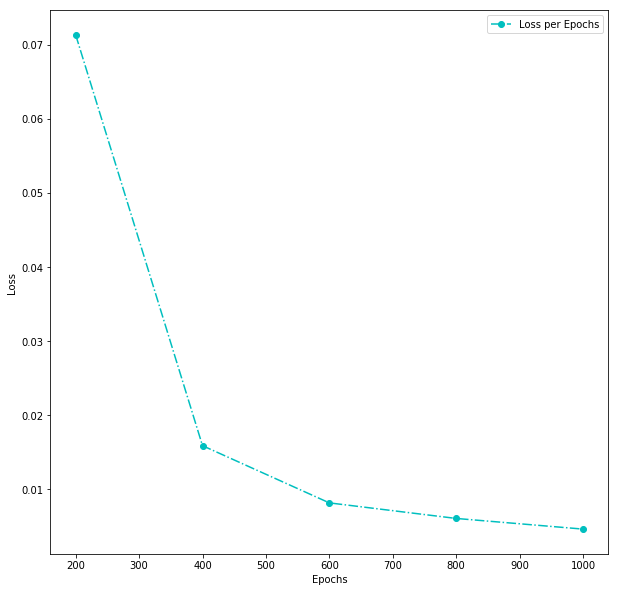

In [152]:
plt.figure(figsize=(10,10))
plt.plot([epo for epo in range(200, 1200, 200)], train_loss_list,'-.o', c='c',label="Loss per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend();

In [154]:
import numpy as np
import matplotlib.pyplot as plt
from keras import models, layers
from keras.optimizers import SGD

In [155]:
#XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[1],[1],[0]])

model = models.Sequential()
model.add(layers.Dense(8, input_dim=2, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))
model.fit(X, Y, batch_size=1, epochs=1000)

Epoch 1/1000
4/4 [==============================] - 1s 252ms/step - loss: 0.7862
Epoch 2/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7695
Epoch 3/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7605
Epoch 4/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7521
Epoch 5/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7458
Epoch 6/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7447
Epoch 7/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.7449
Epoch 8/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7393
Epoch 9/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7367
Epoch 10/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7359
Epoch 11/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7300
Epoch 12/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7300
Epoch 13/1000
4/4 [============================

4/4 [==============================] - 0s 3ms/step - loss: 0.1816
Epoch 104/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1784
Epoch 105/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1745
Epoch 106/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1708
Epoch 107/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1677
Epoch 108/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1644
Epoch 109/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1608
Epoch 110/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1578
Epoch 111/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1550
Epoch 112/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1520
Epoch 113/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1491
Epoch 114/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1463
Epoch 115/1000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.0491
Epoch 205/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0487
Epoch 206/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0483
Epoch 207/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0479
Epoch 208/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0475
Epoch 209/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0472
Epoch 210/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0468
Epoch 211/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0464
Epoch 212/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0461
Epoch 213/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0457
Epoch 214/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0454
Epoch 215/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0451
Epoch 216/1000
4/4 [=======================

4/4 [==============================] - 0s 3ms/step - loss: 0.0265
Epoch 306/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0263
Epoch 307/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0262
Epoch 308/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0261
Epoch 309/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0260
Epoch 310/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0259
Epoch 311/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0257
Epoch 312/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0256
Epoch 313/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0255
Epoch 314/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 315/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0253
Epoch 316/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0252
Epoch 317/1000
4/4 [=======================

4/4 [==============================] - 0s 3ms/step - loss: 0.0178
Epoch 407/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0177
Epoch 408/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0177
Epoch 409/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0176
Epoch 410/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0175
Epoch 411/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0175
Epoch 412/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0174
Epoch 413/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0174
Epoch 414/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0173
Epoch 415/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0173
Epoch 416/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0172
Epoch 417/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0172
Epoch 418/1000
4/4 [=======================

4/4 [==============================] - 0s 3ms/step - loss: 0.0133
Epoch 508/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0132
Epoch 509/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0132
Epoch 510/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0132
Epoch 511/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0131
Epoch 512/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0131
Epoch 513/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0131
Epoch 514/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0130
Epoch 515/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0130
Epoch 516/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0130
Epoch 517/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0129
Epoch 518/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0129
Epoch 519/1000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.0105
Epoch 609/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0105
Epoch 610/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0105
Epoch 611/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0104
Epoch 612/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 613/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 614/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 615/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 616/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103
Epoch 617/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0103
Epoch 618/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103
Epoch 619/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103
Epoch 620/1000
4/4 [=======================

4/4 [==============================] - 0s 3ms/step - loss: 0.0087
Epoch 710/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0087
Epoch 711/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0086
Epoch 712/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 713/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 714/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 715/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 716/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 717/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0085
Epoch 718/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0085
Epoch 719/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 720/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 721/1000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.0074
Epoch 811/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0073
Epoch 812/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 813/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 814/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 815/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 816/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 817/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 818/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 819/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0073
Epoch 820/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0072
Epoch 821/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0072
Epoch 822/1000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 912/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0064
Epoch 913/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0063
Epoch 914/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0063
Epoch 915/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0063
Epoch 916/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 917/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0063
Epoch 918/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 919/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 920/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 921/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0063
Epoch 922/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 923/1000
4/4 [=======================